Make analysis of survey evolution in time

In [2]:
import sys, os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [3]:
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as mb
from lsst.sims.utils import Site
from lsst.sims.utils import calcLmstLast

In [3]:
print(os.path.expanduser('~/Data/db/astro-lsst-01_2013.db'))

/home/docmaf/Data/db/astro-lsst-01_2013.db


In [9]:
# o = db.OpsimDatabase(os.path.expanduser('~/Data/db/astro-lsst-01_2013.db'))
# o = db.OpsimDatabase(os.path.expanduser('~/Data/db/colossus_2340.db'))
o = db.OpsimDatabase(os.path.expanduser('~/Data/db/colossus_2415.db'))
# o = db.OpsimDatabase(os.path.expanduser('~/Data/db/colossus_2412.db'))
# o = db.OpsimDatabase(os.path.expanduser('~/Data/db/astro_lsst_01_1000_sqlite.db'))
propids, proptags = o.fetchPropInfo()
wfdfields = o.fetchFieldsFromFieldTable(proptags['WFD'])
wfdWhere = o.createSQLWhere('WFD', proptags)

# dd_fields = o.fetchFieldsFromFieldTable(proptags['DD'])
# dd_Where = o.createSQLWhere('DD', proptags)

In [4]:
# Pick a (start/end] night
night_start = 0
night_end = 220
sql = '(night > %i and night <= %i)' % (night_start, night_end)
# d = o.query_columns('SummaryAllProps', colnames=['observationId', 'night', 
#                                                  'observationStartMJD', 'observationStartLST', 'fieldRA', 
#                                                  'fieldDec','filter','altitude'], 
#                     sqlconstraint=sql)
# night_end = np.max(d['night'])
print(night_end)
# tnow = d['observationStartMJD'][0]
filter_list = ['r', 'g', 'i', 'z', 'y', 'u']


220


In [6]:
m = metrics.CountMetric('fieldRA', metricName='Total N Visits', )
s = slicers.HealpixSlicer(nside=64) #latCol='zenithDistance', lonCol='azimuth')
filter_list = ['r', 'g', 'i', 'z', 'y', 'u']
plotFuncs=[plots.BaseSkyMap()]
bundle_dic={}

sql = '%s' % (wfdWhere)
sql = ''

# plotDict = {'colorMin':0, 'colorMax': 900, 'xMin':0, 'xMax': 900,
#             'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
#             'title': 'All observations in filter %s, WFD' % obs_filter}
plotDict = {'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
            'title': 'All observations in filterWFD'}


bundle_dic['all'] = mb.MetricBundle(m, s, sql, 
                                     summaryMetrics=[metrics.SumMetric()], 
                                     plotDict=plotDict, 
                                     plotFuncs=plotFuncs)

bdict = mb.MetricBundleGroup(bundle_dic, o)
bdict.runAll()

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA'].
Found 2432324 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [ ]:
bdict.plotAll(closefigs=False)

Plotting figures with "" constraint now.


In [23]:
m = metrics.CountMetric('fieldRA', metricName='Total N Visits', )
s = slicers.HealpixSlicer(nside=64) #latCol='zenithDistance', lonCol='azimuth')
filter_list = ['r', 'g', 'i', 'z', 'y', 'u']
plotFuncs=[plots.BaseSkyMap()]
bundle_dic={}

for obs_filter in filter_list:
#     sql = '(night > %i and night <= %i) and (%s) and filter = "%s"' % (night_start, 
#                                                                        night_end, 
#                                                                        wfdWhere,
#                                                                       obs_filter)    
    sql = '(%s) and filter = "%s" and night = 1' % (wfdWhere,
                                      obs_filter)    


    plotDict = {'colorMin':0, 'colorMax': nvisits[obs_filter], 'xMin':0, 'xMax':nvisits[obs_filter],
                'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
                'title': 'All observations in filter %s, WFD' % obs_filter}
#     plotDict = {'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
#                 'title': 'All observations in filter %s, WFD' % obs_filter}


    bundle_dic['filter_%s'%obs_filter] = mb.MetricBundle(m, s, sql, 
                                                         summaryMetrics=[metrics.SumMetric()], 
                                                         plotDict=plotDict, 
                                                         plotFuncs=plotFuncs)

bdict = mb.MetricBundleGroup(bundle_dic, o)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [71]:
# g = mb.MetricBundleGroup(bdict, o, 'ranking', None)
# g.runAll()
bdict.runAll()

Querying database SummaryAllProps with constraint (proposalId = 3) and filter = "y" for columns ['fieldDec', 'fieldRA']
Found 1089 visits
Running:  ['filter_y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (proposalId = 3) and filter = "u" for columns ['fieldDec', 'fieldRA']
Found 31 visits
Running:  ['filter_u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (proposalId = 3) and filter = "z" for columns ['fieldDec', 'fieldRA']
Found 1122 visits
Running:  ['filter_z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (proposalId = 3) and filter = "r" for columns ['fieldDec', 'fieldRA']
Found 290 visits
Running:  ['filter_r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Co

Plotting figures with "(proposalId = 3) and filter = "y"" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:523: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


Plotting complete.
Plotting figures with "(proposalId = 3) and filter = "u"" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and filter = "z"" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and filter = "r"" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and filter = "i"" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and filter = "g"" constraint now.
Plotting complete.


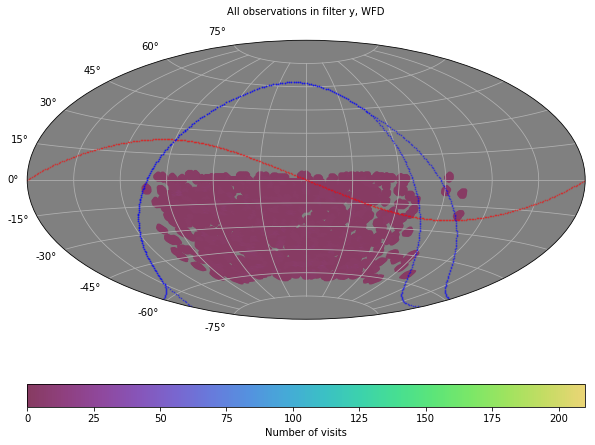

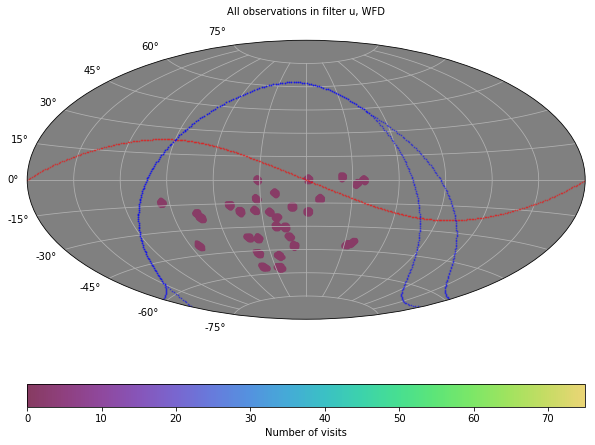

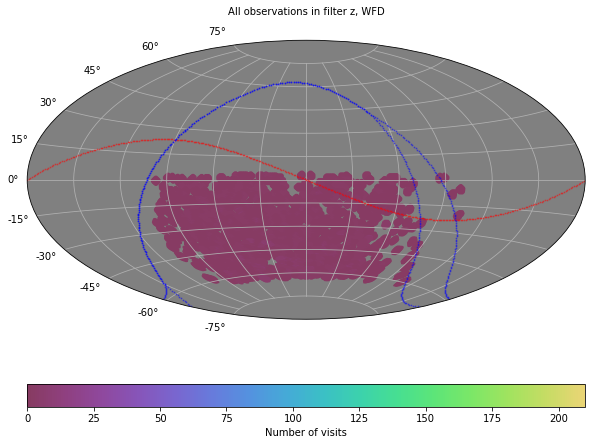

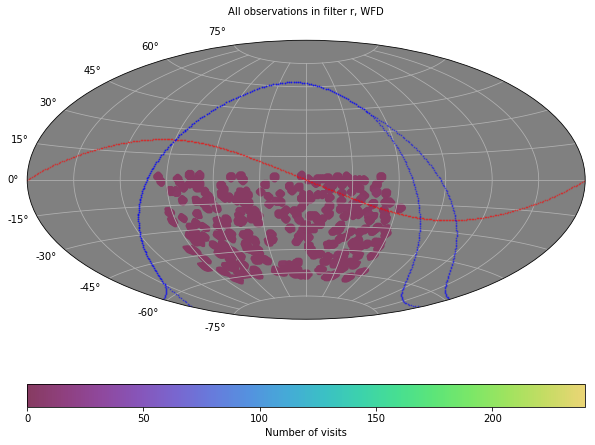

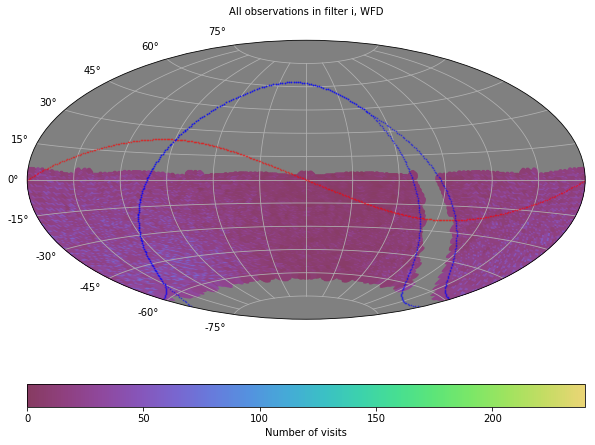

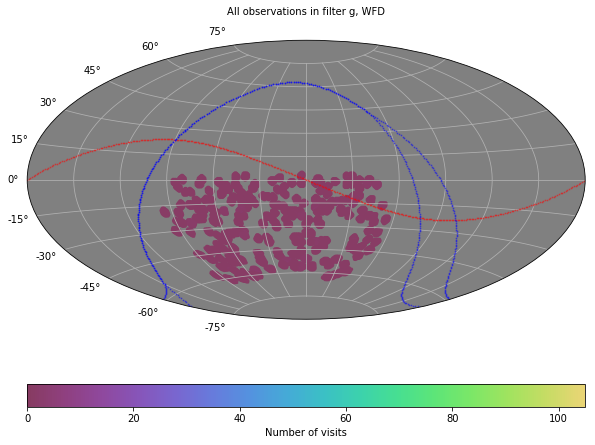

In [73]:
# bundle.plot(plotFunc=plots.BaseSkyMap(),savefig=True)
bdict.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint (proposalId = 3) and (filter = "r") for columns ['altitude', 'fieldRA', 'azimuth']
Found 58090 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (proposalId = 3) and (filter = "u") for columns ['altitude', 'fieldRA', 'azimuth']
Found 24594 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (proposalId = 3) and (filter = "y") for columns ['altitude', 'fieldRA', 'azimuth']
Found 157742 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (proposalId = 3) and (filter = "z") for columns ['altitude', 'fieldRA', 'azimuth']
Found 14159

/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'tri'
  s)
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.
Plotting figures with "(proposalId = 3) and (filter = "u")" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and (filter = "y")" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and (filter = "z")" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and (filter = "i")" constraint now.
Plotting complete.
Plotting figures with "(proposalId = 3) and (filter = "g")" constraint now.
Plotting complete.


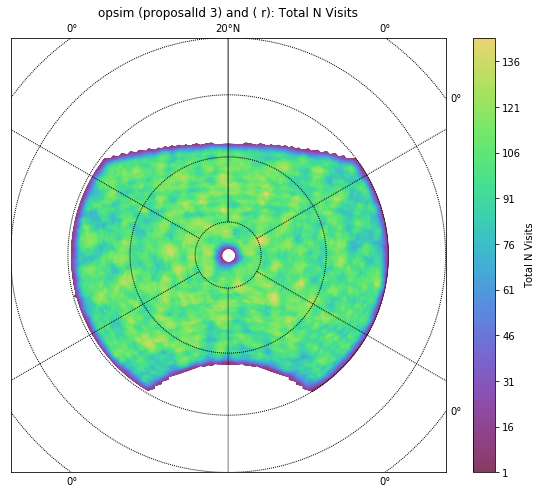

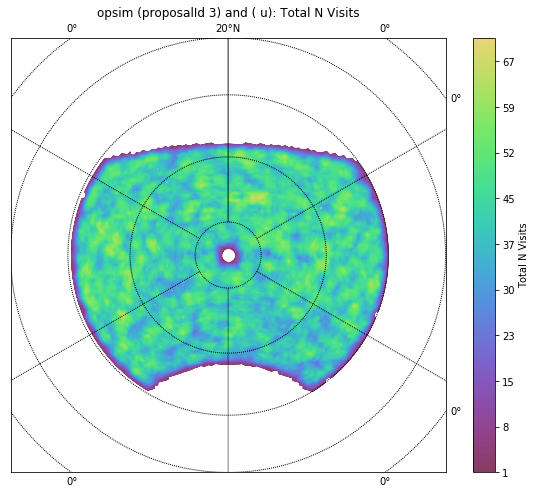

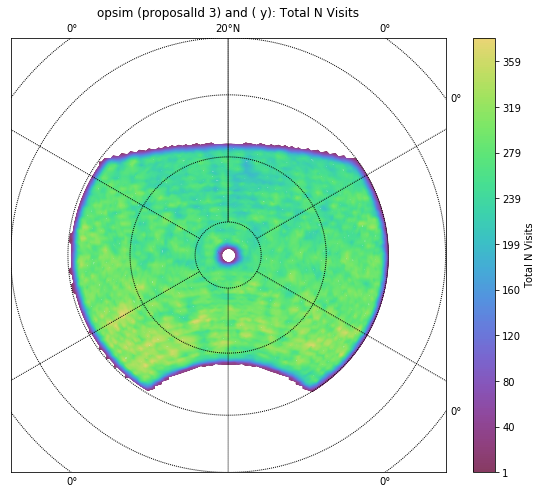

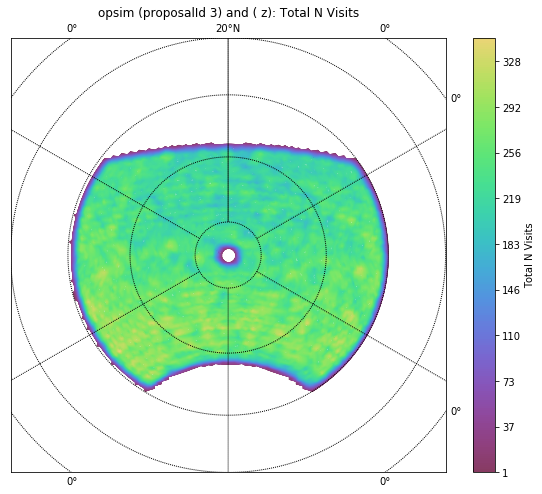

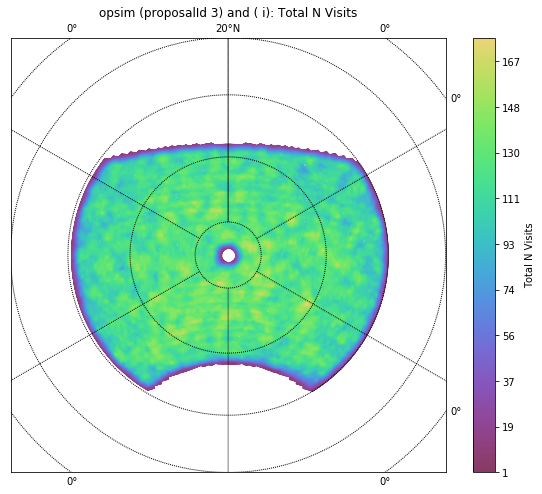

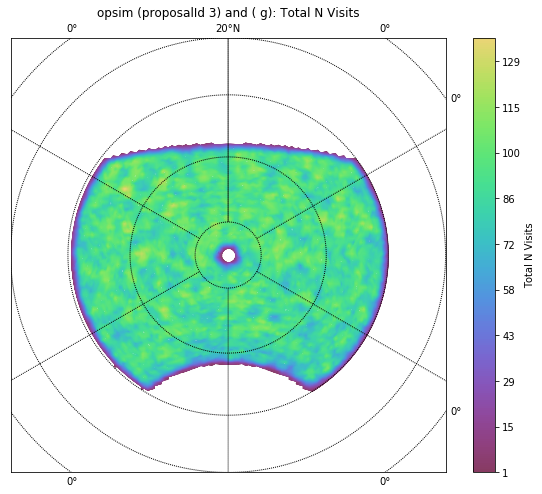

In [13]:
m = metrics.CountMetric('fieldRA', metricName='Total N Visits', )
slicer = slicers.HealpixSlicer(latCol='zenithDistance', lonCol='azimuth', nside=64)
plotFuncs=[plots.LambertSkyMap()]
plotDict = {'figsize':(10, 8),'colorMin':0, 'colorMax': 30 } #, 'xMin':0, 'xMax':10}
plotDict = {'figsize':(10, 8)} #, 'xMin':0, 'xMax':10}
bundle_dict = {}
for obs_filter in filter_list:
#     sql = '(night > %i and night <= %i) and (%s) and filter = "%s"' % (night_start, 
#                                                                        night_end, 
#                                                                        wfdWhere,
#                                                                       obs_filter)    
    sql = '(%s) and (filter = "%s")' % (wfdWhere, obs_filter)    


    bundle_dict[obs_filter] = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = mb.MetricBundleGroup(bundle_dict, o)
bg.runAll()
bg.plotAll(closefigs=False)

In [17]:
plotDict = {'figsize':(10, 8),'colorMin':0, 'colorMax': 30, 'xMin':0, 'xMax':20}
for i in range(7):
    sql = 'night > %i and night <= %i' % (i, i+1)
    bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)
    bdict = mb.makeBundlesDictFromList([bundle])
    bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
    bg = mb.MetricBundleGroup({0:bundle}, o)
    bg.runAll()
    bg.plotAll(savefig=True,outfileSuffix='_night%02i' % (i+1),closefigs=True)   
    break

Querying database SummaryAllProps with constraint night > 0 and night <= 1 for columns ['altitude', 'fieldRA', 'azimuth']
Found 752 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 0 and night <= 1" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:523: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


Plotting complete.


In [ ]:
print(d)

In [15]:
night = 1
sql = 'night == %i' % (night)
d = o.query_columns('SummaryAllProps', colnames=['observationId', 'night', 
                                                 'observationStartMJD', 'observationStartLST', 'fieldRA', 
                                                 'fieldDec','filter','altitude'], 
                    sqlconstraint=sql)

for obsId in d['observationId']:
    sql = 'night == %i and observationId <= %i' % (night, obsId)
    bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)
    bdict = mb.makeBundlesDictFromList([bundle])
    bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
    bg = mb.MetricBundleGroup({0:bundle}, o)
    bg.runAll()
    bg.plotAll(savefig=True,outfileSuffix='_observation%02i' % (obsId),closefigs=True)

NameError: name 's' is not defined

# Filter change histogram

Looking at the filter change distribution...

In [13]:
night_start = 0
night_end = 2
sql = '' #'(night > %i and night <= %i)' % (night_start, night_end)

m_fchanges = metrics.NChangesMetric('filter', metricName='Filter changes metrics.')
slicer_time = slicers.OneDSlicer(sliceColName='night', bins=np.arange(0.5,365))
bundle_fc = mb.MetricBundle(m_fchanges, slicer_time, sql) 
#                          plotDict={'figsize':(10, 8)}, 
#                          plotFuncs=[plots.OneDBinnedData])
bg = mb.MetricBundleGroup({0:bundle_fc}, o)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['filter', 'observationStartMJD', 'night'].
Found 30272 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [ ]:
np.arange(0.5,3651)[-2:]

In [95]:
summaryMetrics = [metrics.SumMetric(),metrics.MeanMetric(), metrics.RmsMetric(),metrics.MaxMetric()]
bundle_fc.setSummaryMetrics(summaryMetrics)
bundle_fc.computeSummaryStats()

In [14]:
print(len(bundle_fc.metricValues))
bundle_fc.metricValues[2]


3650


0.0

In [96]:
bundle_fc.summaryValues

{'Max': 228.0,
 'Mean': 147.41709401709403,
 'Rms': 40.912335486672802,
 'Sum': 86239.0}

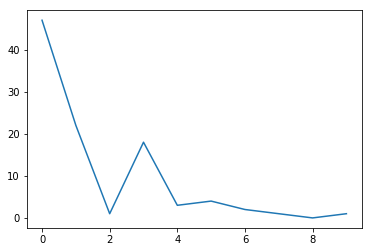

In [12]:
plt.plot(bundle_fc.metricValues.data[:10])

0.0 179.0
179.0
[ 5.  6.  7.  8.  9.]
0.270833333333


Text(0.5,0,'# of filter exchanges')

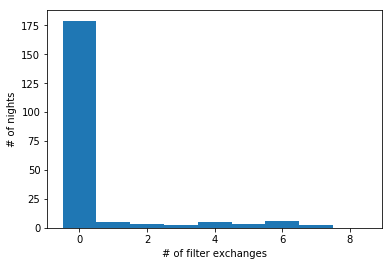

In [14]:
mask = bundle_fc.metricValues.data > .0
bins = np.arange(0.,10)
a = plt.hist(np.array(bundle_fc.metricValues.data[mask]),bins=bins-0.5)

mean_val = np.mean(np.array(bundle_fc.metricValues.data[mask]))
ylim = plt.ylim()
print(bins[np.argmax(a[0])],np.max(a[0]))
print(a[0][0])
print(bins[5:])
print(np.sum(a[0][5:]*bins[5:-1])*2/60./8.)
# plt.plot([mean_val,mean_val], ylim, ':')
# plt.plot([bundle_fc.summaryValues['Mean'],bundle_fc.summaryValues['Mean']],ylim,':')
# plt.plot([bins[np.argmax(a[0])],bins[np.argmax(a[0])]],ylim,':')
# plt.plot([bundle_fc.summaryValues['Max'],bundle_fc.summaryValues['Max']],ylim,':')
# plt.ylim(ylim)

plt.ylabel('# of nights')
plt.xlabel('# of filter exchanges')

# Looking at altitude/airmass distribution.

In [118]:
m_count = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') #, bins=np.arange(0.5,3651))
# s = slicers.HealpixSlicer(nside=128, lonCol='fieldRA', latCol='fieldDec', latLonDeg=True)
sql = '%s' % (wfdWhere) #'(filter == \"u\") and (%s)' % (wfdWhere)
plotDict = {'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
            'title': 'Number of visits in u, WFD',
            'colorMin':54, 'colorMax': 68}
plotFuncs=[plots.BaseSkyMap()]


bundle_altitude = mb.MetricBundle(m_count, slicer_observation, sql) #, plotDict=plotDict, plotFuncs=plotFuncs)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 3 for columns ['altitude', 'observationId']
Found 381853 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [21]:
summaryMetrics = [metrics.SumMetric(),metrics.MeanMetric(), metrics.RmsMetric(),metrics.MaxMetric()]
bundle_altitude.setSummaryMetrics(summaryMetrics)
# bundle_altitude.computeSummaryStats()

NameError: name 'bundle_altitude' is not defined

In [81]:
bundle_altitude.summaryValues

{}

In [82]:
print(len(bundle_altitude.metricValues))

127


In [83]:
bundle_altitude.metricValues.data[0]['altitude']

array([ 85.38345688,  84.88236735,  86.07098128, ...,  67.36284199,
        68.99346144,  64.09018477])

In [84]:
bundle_altitude.metricValues.data[0]['observationId']

array([   97,    98,    99, ..., 18910, 18911, 18912])

In [120]:
alt_size = np.sum(np.array([len(i) for i in bundle_altitude.metricValues.data]))
# print(alt_size)
altitude = np.zeros(alt_size)
bsize1 = len(bundle_altitude.metricValues.data)
start_index = 0

for i in range(bsize1):
    bsize2 = len(bundle_altitude.metricValues.data[i]['altitude'])
    altitude[start_index:start_index+bsize2] += bundle_altitude.metricValues.data[i]['altitude']
    start_index+=bsize2


71.2438093044 8.20269440367
0 34
0.0 33
7728.0 32
20796.0 31
40408.0 30
66356.0 29
98777.0 28
135976.0 27
182329.0 26
217267.0 25
PerCent: 0.642580
67.0


(0.0, 48670.650000000001)

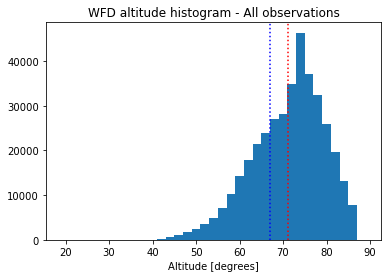

In [122]:
bsize = 2.

mean_altitude = np.mean(altitude)
std_altitude = np.std(altitude)
print(mean_altitude, std_altitude)
plt.title('WFD altitude histogram - All observations')
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.
hist_res = plt.hist(altitude, bins = bins)

total = np.sum(hist_res[0])
tier_1 = 0
ntier_1 = len(hist_res[0])-1
for i in range(len(hist_res[0])):
    if (tier_1+hist_res[0][ntier_1])*1.0 > total*0.68:
        break
    print(tier_1, ntier_1)
    tier_1 += hist_res[0][ntier_1]
    ntier_1 -= 1 

print("PerCent: %f" % (tier_1*1./total))
ylim = plt.ylim()
# plt.plot([mean_altitude+std_altitude,mean_altitude+std_altitude],ylim,'r:')
plt.plot([mean_altitude,mean_altitude],ylim,'r:')
plt.plot([bins[ntier_1],bins[ntier_1]],ylim,'b:')
print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')
# plt.annotate('68%',
#             xy=(bins[ntier_1], 155e3), xycoords='data',color='b')

plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)

# Progress

## Comparing progress on WFD for each filter.

In [15]:
filter_list = ['y', 'z', 'i', 'r', 'g', 'u']

counting_metric = metrics.CountMetric('fieldRA', metricName='CountMetric')
bins=np.arange(0,3649,6)-3.
# bins=np.arange(0,30,1)-0.5
slicer_night = slicers.OneDSlicer(sliceColName='night',bins=bins) 
sql = '%s and filter = "%s"' # WFD 

bundle_dict = {}
for ff in filter_list:
    bundle_dict[ff] = mb.MetricBundle(counting_metric, slicer_night, sql % (wfdWhere,ff))
    
bg = mb.MetricBundleGroup(bundle_dict, o)    
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 3 and filter = "g" for columns ['fieldRA', 'night']
Found 51982 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId = 3 and filter = "z" for columns ['fieldRA', 'night']
Found 141591 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId = 3 and filter = "i" for columns ['fieldRA', 'night']
Found 68138 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId = 3 and filter = "u" for columns ['fieldRA', 'night']
Found 24594 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllPro

In [33]:
# bg.plotAll(closefigs=False)
print

<function print>

In [56]:
# print(bundle_dict['z'].slicer.slicePoints)
# print(bundle_dict['z'].metricValues)
print(wdf_progress['r'][0])

1549.0


In [16]:
wdf_progress = {}
for ff in filter_list:
    wdf_progress[ff] = np.zeros(len(bundle_dict[ff].metricValues)-1)
    for i in range(len(wdf_progress[ff])-1):
        wdf_progress[ff][i:] +=  bundle_dict[ff].metricValues[i]
#         print(ff,i,bundle_dict[ff].metricValues[i])

y 156613.0
z 140542.0
i 67829.0
r 57876.0
g 51814.0
u 24594.0
total: 2476440


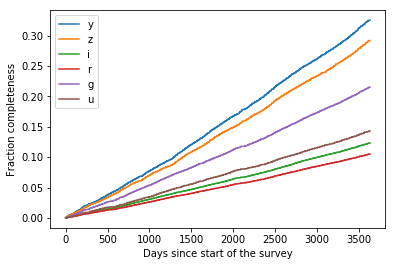

In [17]:
nights = (bins[1:]+bins[:-1])/2.
nights = nights[:-1]

nvisits = {'y' : 210,
'z' : 210,
'i' : 240,
'r' : 240,
'g' : 105,
'u' : 75}

nfields = 2293
total_visits_per_field = np.sum([i for i in nvisits.values()])
total_visits = nfields*total_visits_per_field


for ff in filter_list:
#     total_visits+=np.max(wdf_progress[ff])
    print(ff,np.max(wdf_progress[ff]))
#     plt.plot(nights/365., 
#              wdf_progress[ff]/np.max(wdf_progress[ff]) - wdf_progress['z']/np.max(wdf_progress['z']), 
#              label=ff)
#     plt.plot(nights, 
#              wdf_progress[ff]/(nvisits[ff]*nfields) - wdf_progress['z']/(nvisits['z']*nfields), 
#              label=ff,
#              ls='steps-mid')
    plt.plot(nights, 
             wdf_progress[ff]/(nvisits[ff]*nfields), 
             label=ff,
             ls='steps-mid')


plt.legend()
plt.xlabel('Days since start of the survey')
plt.ylabel('Fraction completeness')
print('total:',total_visits)
# plt.xlim(0,360)

Quantos % do tempo de telescopio esta sendo dedicado a cada filtro?

Isso é basicamente o numero de visitas em cada filtro multiplicado pelo tempo de cada visita ~ 34s dividido pelo "numero de visitas disponíveis" (NDV). Podemos considerar NVD aproximadamente como o numero de visitas total acumulado até uma determinada noite. Note que NVD cresce a medida que o levantamento evolui. Por exemplo, se no dia 1 fizemos 1000 visitas e no dia 2 outras 1000 visitas, NVD no dia 1 será 1000 e 2000 no dia 2. 


In [18]:
nvd = np.zeros(len(nights))
for i in range(len(nights)):
#     print([wdf_progress[ff][i] for ff in filter_list])
    nvd[i] += np.sum(np.array([wdf_progress[ff][i] for ff in filter_list]))

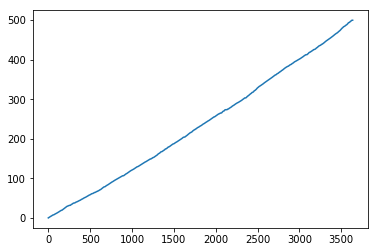

In [19]:
plt.plot(nights, nvd/1e3)

y: 0.194444
z: 0.194444
i: 0.222222
r: 0.222222
g: 0.097222
u: 0.069444


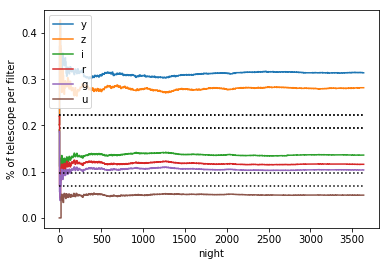

In [20]:
for ff in filter_list:
    print('%s: %f' % (ff, nvisits[ff]/total_visits_per_field))
    plt.plot(nights, 
             wdf_progress[ff]/nvd, #-nvisits[ff]/total_visits_per_field, 
             label=ff,
             ls='steps-mid')
    plt.plot([nights[0],nights[-1]],
             [nvisits[ff]/total_visits_per_field,nvisits[ff]/total_visits_per_field],
            'k:')
# plt.plot(nights, nvd,label='nvd')
plt.legend()
plt.xlabel('night')
plt.ylabel('% of telescope per filter')
xlim = plt.xlim()
# plt.xlim(0,360)

## Look at inter-project progress

In [80]:
propids, proptags = o.fetchPropInfo()

In [81]:
print(proptags)

{'WFD': [3], 'DD': [5]}


In [82]:
print(propids)

{1: 'NorthEclipticSpur', 2: 'SouthCelestialPole', 3: 'WideFastDeep', 4: 'GalacticPlane', 5: 'DeepDrillingCosmology1'}


In [83]:
counting_metric = metrics.CountMetric('fieldRA', metricName='CountMetric')
bins=np.arange(0,3649,6)-3.
slicer_night = slicers.OneDSlicer(sliceColName='night',bins=bins) 
sql = 'proposalId = %i'  

bundle_dict = {}
for pid in propids.keys():
    bundle_dict[propids[pid]] = mb.MetricBundle(counting_metric, slicer_night, sql % pid)
    
bg = mb.MetricBundleGroup(bundle_dict, o)    
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 3 for columns ['fieldRA', 'night']
Found 2100047 visits
Running:  ['WideFastDeep']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId = 2 for columns ['fieldRA', 'night']
Found 39130 visits
Running:  ['SouthCelestialPole']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId = 4 for columns ['fieldRA', 'night']
Found 30689 visits
Running:  ['GalacticPlane']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId = 1 for columns ['fieldRA', 'night']
Found 138339 visits
Running:  ['NorthEclipticSpur']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with co

In [84]:
prop_progress = {}
for pid in propids.keys():
    prop_progress[propids[pid]] = np.zeros(len(bundle_dict[propids[pid]].metricValues)-1)
    for i in range(len(prop_progress[propids[pid]])-1):
        prop_progress[propids[pid]][i:] +=  bundle_dict[propids[pid]].metricValues[i]

In [85]:
nvd = np.zeros(len(nights))
for i in range(len(nights)):
    nvd[i] += np.sum(np.array([prop_progress[propids[pid]][i] for pid in propids.keys()]))

Text(0,0.5,'Number of visits $\\times 10^6$')

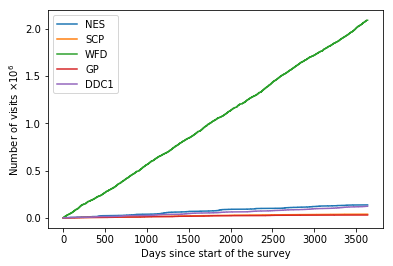

In [86]:
nights = (bins[1:]+bins[:-1])/2.
nights = nights[:-1]

# nfields = 2293
# total_visits_per_field = np.sum([i for i in nvisits.values()])
# total_visits = nfields*total_visits_per_field

for pid in propids.keys():
    prop_prg = prop_progress[propids[pid]]/nvd
    show_str = ''
    for ss in propids[pid]:
        if ss == ss.upper():
            show_str+=ss
    plt.plot(nights, 
             prop_progress[propids[pid]]/1.e6, 
#              label='%s - %4.1f' % (show_str,np.median(prop_prg)*100.),
             label='%s' % (show_str),
             ls='steps-mid')


plt.legend()
plt.xlabel('Days since start of the survey')
plt.ylabel('Number of visits $\\times 10^6$')

Text(0,0.5,'Fractional progress')

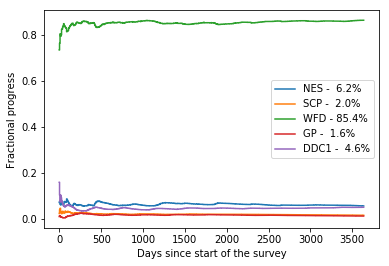

In [87]:
nights = (bins[1:]+bins[:-1])/2.
nights = nights[:-1]

# nfields = 2293
# total_visits_per_field = np.sum([i for i in nvisits.values()])
# total_visits = nfields*total_visits_per_field

for pid in propids.keys():
    prop_prg = prop_progress[propids[pid]]/nvd
    show_str = ''
    for ss in propids[pid]:
        if ss == ss.upper():
            show_str+=ss
    plt.plot(nights, 
             prop_prg, 
             label='%s - %4.1f%%' % (show_str,np.median(prop_prg)*100.),
             ls='steps-mid')


plt.legend()
plt.xlabel('Days since start of the survey')
plt.ylabel('Fractional progress')

# Slew time alt/az maps

In [133]:
np.arange(37) % 27

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9])

In [17]:
m = metrics.MedianMetric('slewTime', metricName='Median Slew Time', )
s = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth')
sql = ''
plotDict = {'figsize':(10, 8), 'xlabel':'Median slew time', 'raCen': 0.,
            'title': 'All observations','colorMin':1, 'colorMax': 15, 'xMin':1, 'xMax':15}
plotFuncs=[plots.LambertSkyMap()]
bundle_dic={}
bundle_dic['metric 01'] = mb.MetricBundle(m, s, sql, 
                                                     summaryMetrics=[metrics.SumMetric()], 
                                                     plotDict=plotDict, 
                                                     plotFuncs=plotFuncs)

bdict = mb.MetricBundleGroup(bundle_dic, o)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [18]:
bdict.runAll()

Querying database SummaryAllProps with no constraint for columns ['altitude', 'slewTime', 'azimuth'].
Found 2364554 visits
Running:  ['metric 01']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.


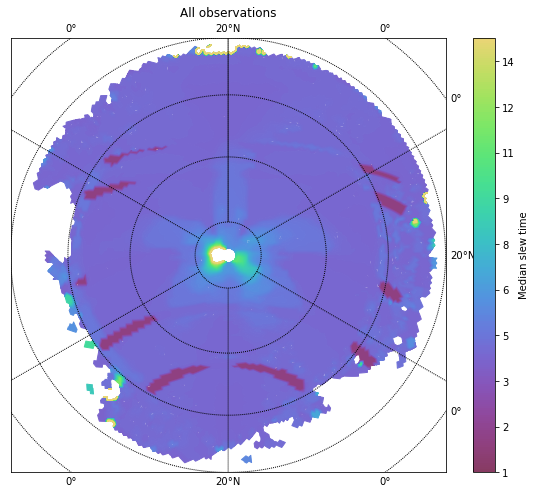

In [19]:
bdict.plotAll(closefigs=False)

In [29]:
m = metrics.MinMetric('slewTime', metricName='Min Slew Time', )
s = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth')
sql = ''
plotDict = {'figsize':(10, 8), 'xlabel':'Min slew time', 'raCen': 0.,
            'title': 'All observations'} #,'colorMin':1, 'colorMax': 15, 'xMin':1, 'xMax':15}
plotFuncs=[plots.LambertSkyMap()]
bundle_dic={}
bundle_dic['metric 01'] = mb.MetricBundle(m, s, sql, 
                                                     summaryMetrics=[metrics.SumMetric()], 
                                                     plotDict=plotDict, 
                                                     plotFuncs=plotFuncs)

bdict = mb.MetricBundleGroup(bundle_dic, o)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [30]:
bdict.runAll()

Querying database SummaryAllProps with no constraint for columns ['altitude', 'slewTime', 'azimuth'].
Found 2364554 visits
Running:  ['metric 01']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.


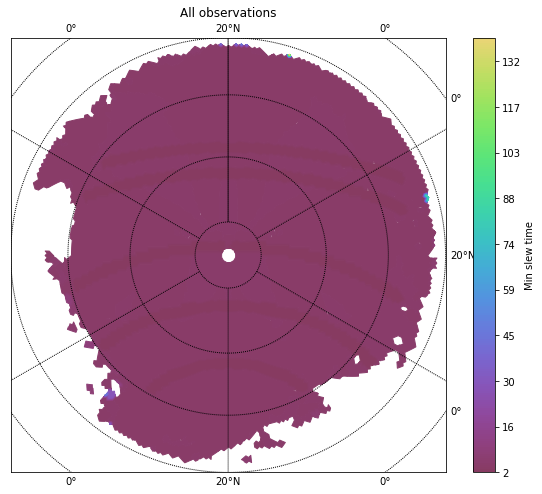

In [31]:
bdict.plotAll(closefigs=False)

In [26]:
m = metrics.MaxMetric('slewTime', metricName='Max Slew Time', )
s = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth')
sql = ''
plotDict = {'figsize':(10, 8), 'xlabel':'Max slew time', 'raCen': 0.,
            'title': 'All observations'} #,'colorMin':1, 'colorMax': 15, 'xMin':1, 'xMax':15}
plotFuncs=[plots.LambertSkyMap()]
bundle_dic={}
bundle_dic['metric 01'] = mb.MetricBundle(m, s, sql, 
                                                     summaryMetrics=[metrics.SumMetric()], 
                                                     plotDict=plotDict, 
                                                     plotFuncs=plotFuncs)

bdict = mb.MetricBundleGroup(bundle_dic, o)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [27]:
bdict.runAll()

Querying database SummaryAllProps with no constraint for columns ['altitude', 'slewTime', 'azimuth'].
Found 2364554 visits
Running:  ['metric 01']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.


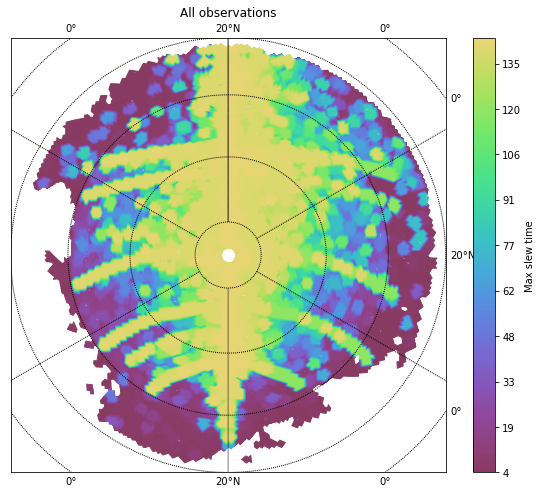

In [28]:
bdict.plotAll(closefigs=False)

In [26]:
import random

In [37]:
a = [ i for i in range(100) ]

In [38]:
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [39]:
random.shuffle(a)

In [40]:
print(a)

[48, 17, 45, 75, 53, 64, 51, 43, 68, 50, 98, 58, 13, 84, 87, 82, 91, 19, 93, 86, 22, 25, 89, 67, 72, 1, 79, 26, 44, 74, 90, 12, 5, 85, 54, 70, 4, 83, 34, 41, 15, 52, 18, 69, 2, 29, 99, 60, 9, 77, 30, 55, 23, 28, 0, 57, 76, 46, 81, 10, 47, 94, 96, 73, 62, 92, 38, 78, 3, 11, 27, 7, 33, 97, 16, 6, 21, 95, 14, 40, 42, 49, 71, 37, 31, 32, 39, 24, 56, 20, 61, 65, 59, 63, 66, 36, 35, 8, 88, 80]


Analysing the progress of each project/proposal.